<center>
<img src="http://www.bigdive.eu/wp-content/uploads/2012/05/logoBIGDIVE-01.png">
</center>

---

# Clustering

## André Panisson

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Prepare a sinthetic dataset for this example.

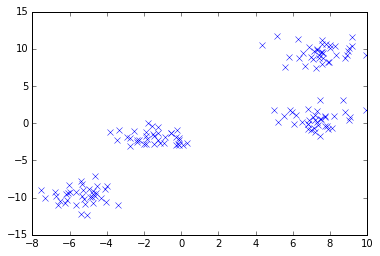

In [2]:
from sklearn import datasets

X, _ = datasets.make_blobs(n_samples=150, random_state=8, centers=4)
# X, _ = datasets.make_circles(n_samples=150, factor=.5, noise=.05)

plot(X[:, 0], X[:, 1], 'bx')

# Kmeans clustering

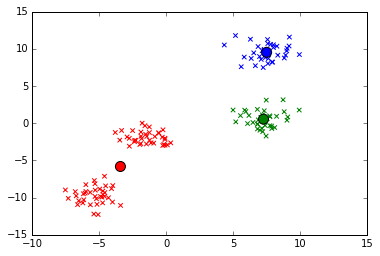

In [16]:
np.random.seed(42)

from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=3, init='random',
                        n_init=1, max_iter=10)
C = kmeans.fit_predict(X)  # fit sui dati e predict restituisce in C il cluster di appartenenza di ogni punto

colors = array(['b', 'r', 'g', 'k'])
scatter(X[:, 0], X[:, 1], marker="x", c=colors[C])

centers = kmeans.cluster_centers_
scatter(centers[:, 0], centers[:, 1], s=100, c=colors)

# Hierarchical clustering

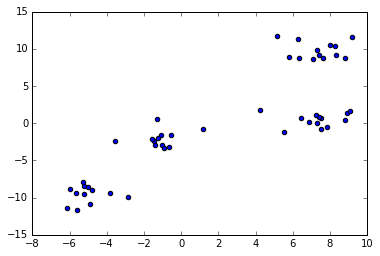

In [17]:
X, _ = datasets.make_blobs(n_samples=50, random_state=8, centers=4)
# X, _ = datasets.make_circles(n_samples=200, factor=.1, noise=.05)

scatter(X[:, 0], X[:, 1]);

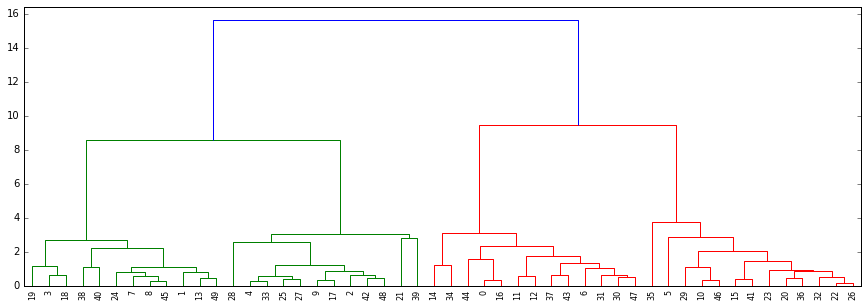

In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z = linkage(X, method='average', metric='euclidean')
figure(figsize=(15,5))
P = dendrogram(Z);

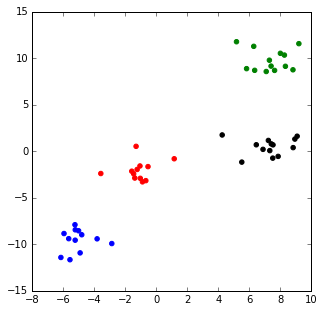

In [19]:
T = fcluster(Z, 4, 'maxclust') # tagli la'labero in qualche punto con un max di 4 cluster

figure(figsize=(5,5))
colors = array(['b', 'r', 'g', 'k'])
scatter(X[:, 0], X[:, 1], color=colors[T-1]);

### Hierarchical Clustering in Scikit-Learn:

In [ ]:
from sklearn import cluster

model = cluster.AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')

clusters = model.fit_predict(X)

figure(figsize=(5,5))
colors = array(['b', 'r', 'g', 'k'])
scatter(X[:, 0], X[:, 1], color=colors[clusters-1]);

# Excercise

Test the different clustering approaches with a "circles" dataset.

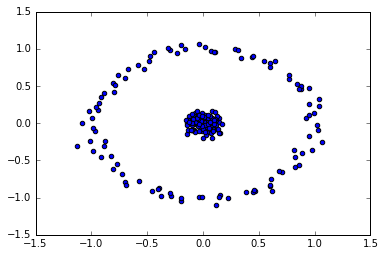

In [20]:
X, _ = datasets.make_circles(n_samples=200, factor=.1, noise=.05)

scatter(X[:, 0], X[:, 1]);

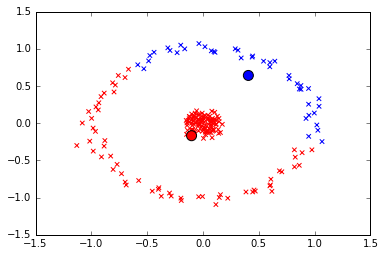

In [28]:
np.random.seed(42)

kmeans = cluster.KMeans(n_clusters=2, init='random',
                        n_init=1, max_iter=10)
C = kmeans.fit_predict(X)  # fit sui dati e predict restituisce in C il cluster di appartenenza di ogni punto

colors = array(['b', 'r', 'g', 'k'])
scatter(X[:, 0], X[:, 1], marker="x", c=colors[C])

centers = kmeans.cluster_centers_
scatter(centers[:, 0], centers[:, 1], s=100, c=colors)

/home/bigdive/anaconda2/lib/python2.7/site-packages/sklearn/cluster/hierarchical.py:443: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


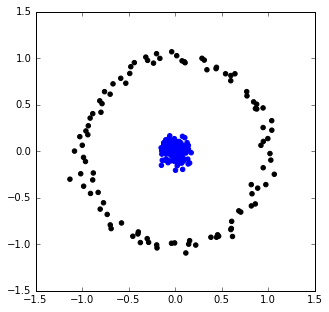

In [34]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)
    
model = cluster.AgglomerativeClustering(n_clusters=2, affinity='cityblock', linkage='average', connectivity = connectivity)

clusters = model.fit_predict(X)

figure(figsize=(5,5))
colors = array(['b', 'r', 'g', 'k'])
scatter(X[:, 0], X[:, 1], color=colors[clusters-1]);

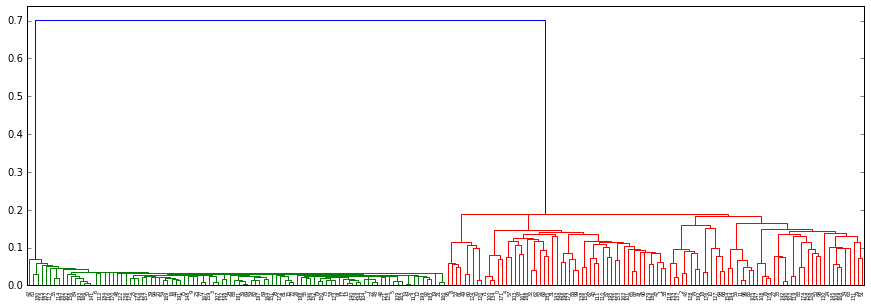

In [43]:
Z = linkage(X, method='single', metric='euclidean')
figure(figsize=(15,5))
P = dendrogram(Z);

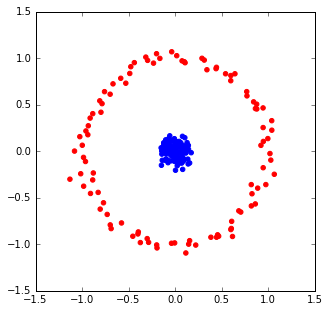

In [44]:
T = fcluster(Z, 2, 'maxclust') # tagli l'labero in qualche punto con un max di 4 cluster

figure(figsize=(5,5))
colors = array(['b', 'r', 'g', 'k'])
scatter(X[:, 0], X[:, 1], color=colors[T-1]);